### Reviewing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# change options for max rows or columns

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [3]:
cust = pd.read_csv(r'F:\data science\Jupyter\work file\DSC680\1\customer_segmentation.csv')
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
cust = cust.drop(columns=['Z_CostContact','Z_Revenue'])

In [5]:
cust = cust[cust['Year_Birth']>1942].copy()

In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2235 non-null   int64  
 1   Year_Birth           2235 non-null   int64  
 2   Education            2235 non-null   object 
 3   Marital_Status       2235 non-null   object 
 4   Income               2211 non-null   float64
 5   Kidhome              2235 non-null   int64  
 6   Teenhome             2235 non-null   int64  
 7   Dt_Customer          2235 non-null   object 
 8   Recency              2235 non-null   int64  
 9   MntWines             2235 non-null   int64  
 10  MntFruits            2235 non-null   int64  
 11  MntMeatProducts      2235 non-null   int64  
 12  MntFishProducts      2235 non-null   int64  
 13  MntSweetProducts     2235 non-null   int64  
 14  MntGoldProds         2235 non-null   int64  
 15  NumDealsPurchases    2235 non-null   i

In [7]:
cust['Response'].value_counts()

0    1901
1     334
Name: Response, dtype: int64

In [8]:
cust.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

set up a bool for whether or not a row has a child, rather than naming how many children in the offered bins

In [9]:
cust['children'] = np.where(cust['Kidhome']!=0,1,
                            np.where(cust['Teenhome']!=0,1,0))
cust[['Kidhome','Teenhome','children']]

,Kidhome,Teenhome,children
0,0,0,0
1,1,1,1
2,0,0,0
3,1,0,1
4,1,0,1
...,...,...,...
2235,0,1,1
2236,2,1,1
2237,0,0,0
2238,0,1,1


Income is a bit too spread out, so setting up bins to group incomes together, there were a handful above 150k that would likely throw off data, so by binning them I can control those outliers, and group them together, because 150k and 600k are essentially the same

In [10]:
cust['Income_Bracket'] = np.where((cust['Income']>=0) & (cust['Income']<=25000),'0-25k',
                                 np.where((cust['Income']>25000) & (cust['Income'] <= 50000),'25k-50k',
                                         np.where((cust['Income']>50000) & (cust['Income'] <=75000),'50k-75k',
                                                 np.where((cust['Income']>75000) & (cust['Income']<=100000),'75k-100k',
                                                         np.where((cust['Income']>100000) & (cust['Income']<=150000),'100k-150k','150k+')))))
cust['Income_Bracket'].value_counts()

25k-50k      817
50k-75k      795
75k-100k     344
0-25k        242
150k+         32
100k-150k      5
Name: Income_Bracket, dtype: int64

similarly with income, the year birth is a bit too wide spread, so bucketing them will help simplify classification

In [11]:
cust['Generation'] = np.where((cust['Year_Birth']<1946),'silent gen',
                             np.where((cust['Year_Birth']>=1946) & (cust['Year_Birth']<1965),'baby boom gen',
                                     np.where((cust['Year_Birth']>=1965)&(cust['Year_Birth']<1981),'gen x','milennial gen',)))
cust['Generation'].value_counts()

gen x            1069
baby boom gen     759
milennial gen     385
silent gen         22
Name: Generation, dtype: int64

the dt_customer value is just a start date, with no real relation to today, so I transformed it to a years value to show how many years they had been a customer

In [12]:
import datetime

In [13]:
cust['today']=pd.to_datetime(datetime.date.today())
cust['Dt_Customer'] = pd.to_datetime(cust['Dt_Customer'],dayfirst=True)
cust['today'],cust['Dt_Customer']

(0      2024-12-21
 1      2024-12-21
 2      2024-12-21
 3      2024-12-21
 4      2024-12-21
           ...    
 2235   2024-12-21
 2236   2024-12-21
 2237   2024-12-21
 2238   2024-12-21
 2239   2024-12-21
 Name: today, Length: 2235, dtype: datetime64[ns],
 0      2012-09-04
 1      2014-03-08
 2      2013-08-21
 3      2014-02-10
 4      2014-01-19
           ...    
 2235   2013-06-13
 2236   2014-06-10
 2237   2014-01-25
 2238   2014-01-24
 2239   2012-10-15
 Name: Dt_Customer, Length: 2235, dtype: datetime64[ns])

In [14]:
cust['Days'] = (cust['today'] - cust['Dt_Customer']).dt.days
cust['years'] = cust['Days']/365
cust['years']

0       12.304110
1       10.797260
2       11.342466
3       10.868493
4       10.928767
          ...    
2235    11.531507
2236    10.539726
2237    10.912329
2238    10.915068
2239    12.191781
Name: years, Length: 2235, dtype: float64

In [15]:
cust['Recency'].value_counts()

56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

In [16]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2235 non-null   int64         
 1   Year_Birth           2235 non-null   int64         
 2   Education            2235 non-null   object        
 3   Marital_Status       2235 non-null   object        
 4   Income               2211 non-null   float64       
 5   Kidhome              2235 non-null   int64         
 6   Teenhome             2235 non-null   int64         
 7   Dt_Customer          2235 non-null   datetime64[ns]
 8   Recency              2235 non-null   int64         
 9   MntWines             2235 non-null   int64         
 10  MntFruits            2235 non-null   int64         
 11  MntMeatProducts      2235 non-null   int64         
 12  MntFishProducts      2235 non-null   int64         
 13  MntSweetProducts     2235 non-nul

### Prepping Data for Modeling

In [17]:
cust2 = cust.drop(columns=['ID','Year_Birth','Income','Dt_Customer','today','Days'])

In [18]:
cust2

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children,Income_Bracket,Generation,years
0,Graduation,Single,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,50k-75k,baby boom gen,12.304110
1,Graduation,Single,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1,25k-50k,baby boom gen,10.797260
2,Graduation,Together,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,50k-75k,gen x,11.342466
3,Graduation,Together,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,25k-50k,milennial gen,10.868493
4,PhD,Married,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,50k-75k,milennial gen,10.928767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,50k-75k,gen x,11.531507
2236,PhD,Together,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1,50k-75k,baby boom gen,10.539726
2237,Graduation,Divorced,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,50k-75k,milennial gen,10.912329
2238,Master,Together,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,50k-75k,baby boom gen,10.915068


In [19]:
change = ['Education','Marital_Status','Income_Bracket','Generation']

for col in change:
    cust2[f'{col}_num'] = cust2[col].astype('category').cat.codes
cust2

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children,Income_Bracket,Generation,years,Education_num,Marital_Status_num,Income_Bracket_num,Generation_num
0,Graduation,Single,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,50k-75k,baby boom gen,12.304110,2,4,4,0
1,Graduation,Single,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1,25k-50k,baby boom gen,10.797260,2,4,3,0
2,Graduation,Together,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,50k-75k,gen x,11.342466,2,5,4,1
3,Graduation,Together,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,25k-50k,milennial gen,10.868493,2,5,3,2
4,PhD,Married,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,50k-75k,milennial gen,10.928767,4,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,50k-75k,gen x,11.531507,2,3,4,1
2236,PhD,Together,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1,50k-75k,baby boom gen,10.539726,4,5,4,0
2237,Graduation,Divorced,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,50k-75k,milennial gen,10.912329,2,2,4,2
2238,Master,Together,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,50k-75k,baby boom gen,10.915068,3,5,4,0


In [20]:
cust3 = cust2.drop(columns=change)
cust3

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children,years,Education_num,Marital_Status_num,Income_Bracket_num,Generation_num
0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,12.304110,2,4,4,0
1,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1,10.797260,2,4,3,0
2,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,11.342466,2,5,4,1
3,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,10.868493,2,5,3,2
4,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,10.928767,4,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,11.531507,2,3,4,1
2236,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1,10.539726,4,5,4,0
2237,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,10.912329,2,2,4,2
2238,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,10.915068,3,5,4,0


### EDA

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

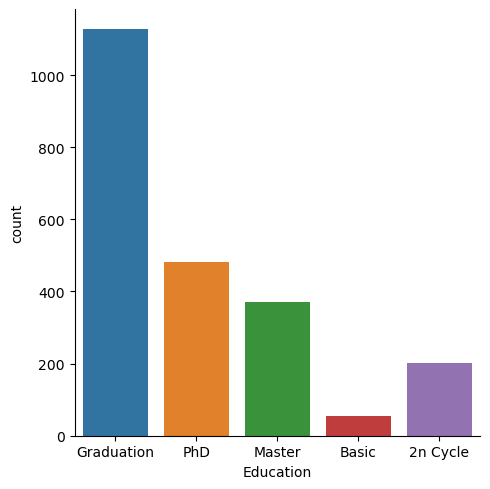

In [22]:
sns.catplot(data=cust,kind="count",x='Education')
plt.show()

a count of customers and their year of birth, we can see a relative normal distribution meaning that the bulk of the customers are going to be born in the 70s, this will likely become an important segment when running the segmentation.

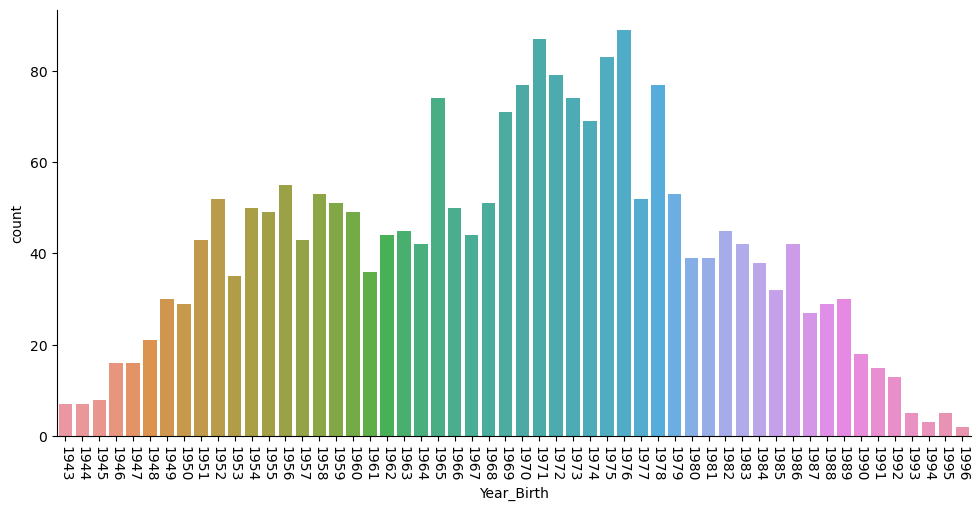

In [23]:
sns.catplot(data=cust,kind="count",x='Year_Birth',height=5,aspect=2)
plt.xticks(rotation=-90)
plt.show()

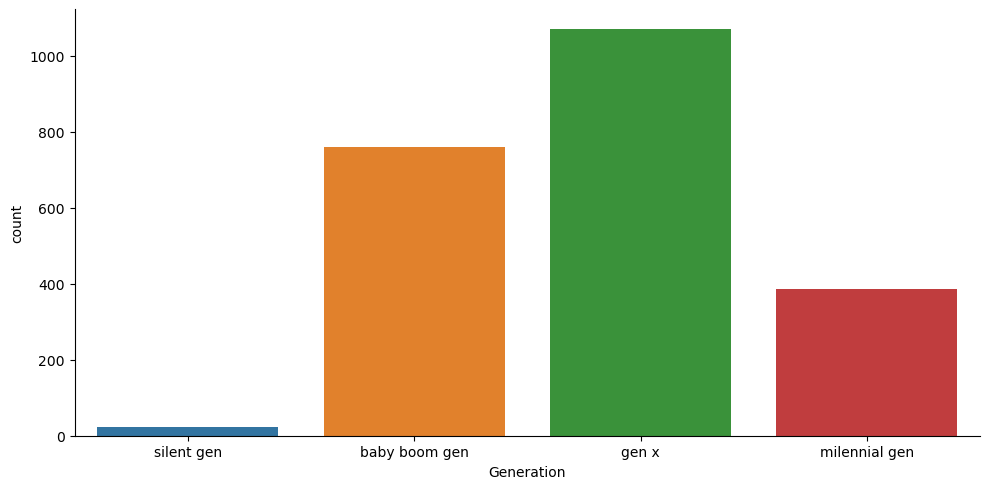

In [24]:
sns.catplot(data=cust,kind="count",x='Generation',height=5,aspect=2,order=['silent gen','baby boom gen','gen x','milennial gen'])
plt.show()

<Figure size 1000x500 with 0 Axes>

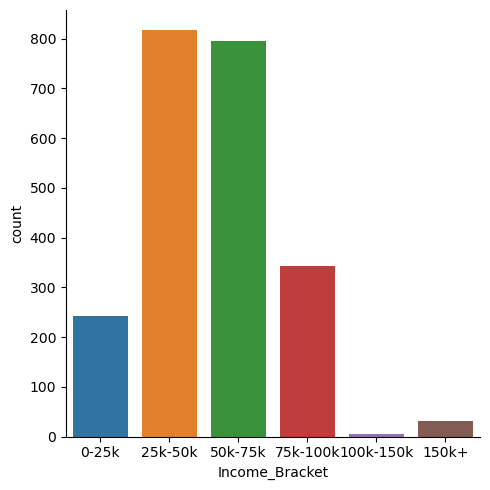

In [25]:
plt.figure(figsize=[10,5])
sns.catplot(data=cust,x='Income_Bracket',kind='count',order=['0-25k','25k-50k','50k-75k','75k-100k','100k-150k','150k+'])
plt.show()

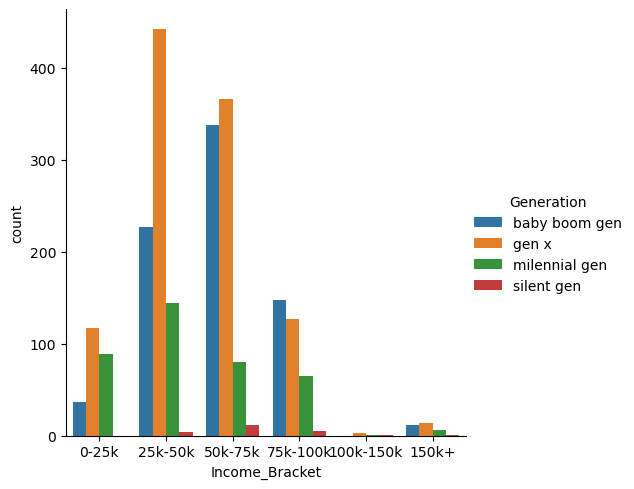

In [26]:
sns.catplot(data=cust,x='Income_Bracket',kind='count',hue='Generation',order=['0-25k','25k-50k','50k-75k','75k-100k','100k-150k','150k+'])
plt.show()

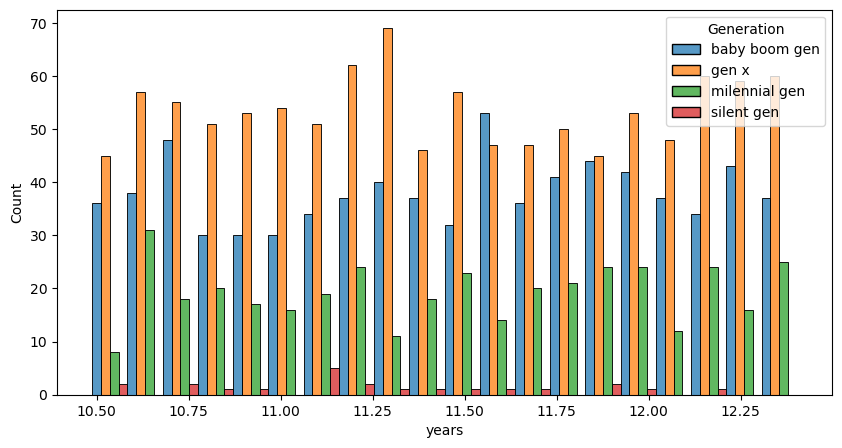

In [27]:
plt.figure(figsize=[10,5])
sns.histplot(data=cust,x='years',bins=20,hue='Generation',multiple='dodge')
plt.show()

A count of the amount of products sold, this information is not as enlightening, as so much of the data lives in those lower values

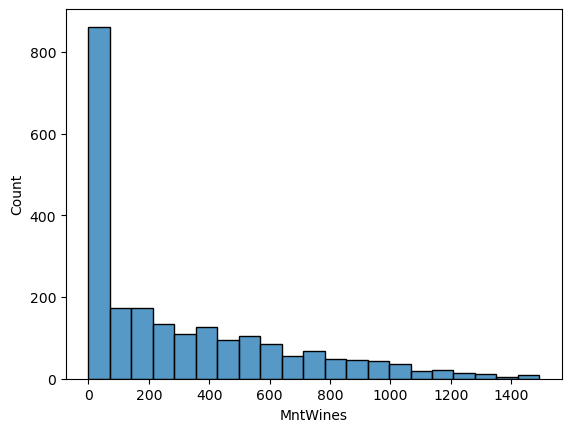

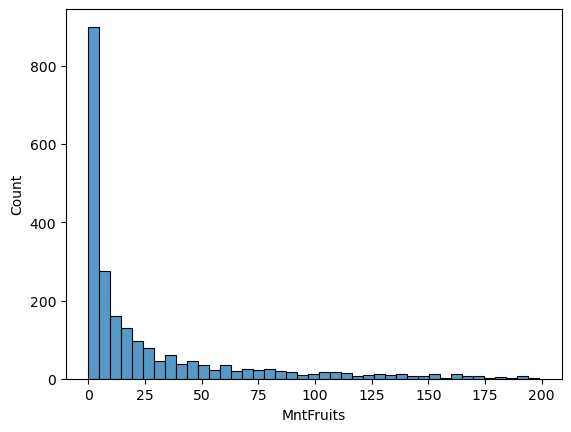

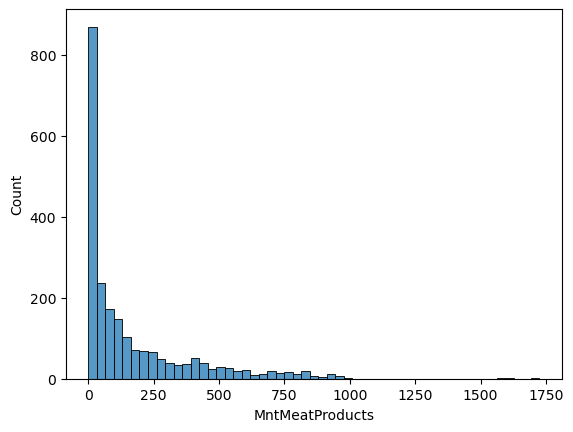

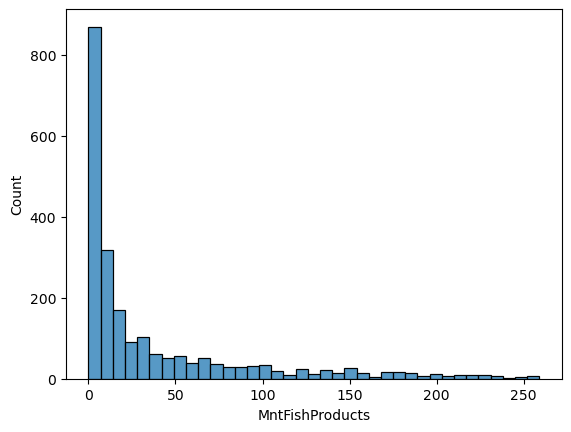

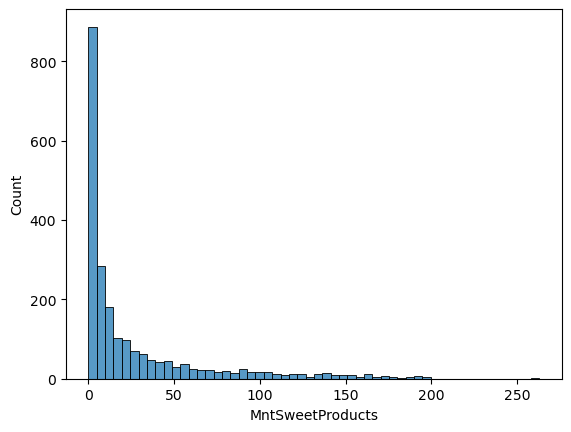

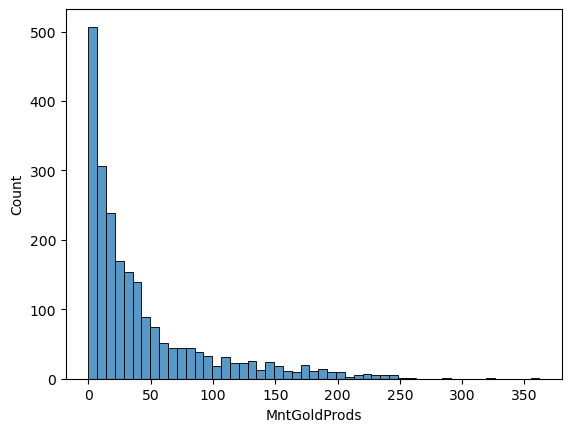

In [28]:
prod = cust[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

for i in prod:
    sns.histplot(data=cust,x=i)
    plt.show()

The box plots to a better job of describing the amounts and the purchases, looking at them through the lense of the birthdays gives us a better idea of interpreting the data. though the upper 3 and lower 3 birth years have so few people in them that the data is not as reliable, because looking at these numbers it looks like those groups have higher spending habits, where really it is just a lower sample size.

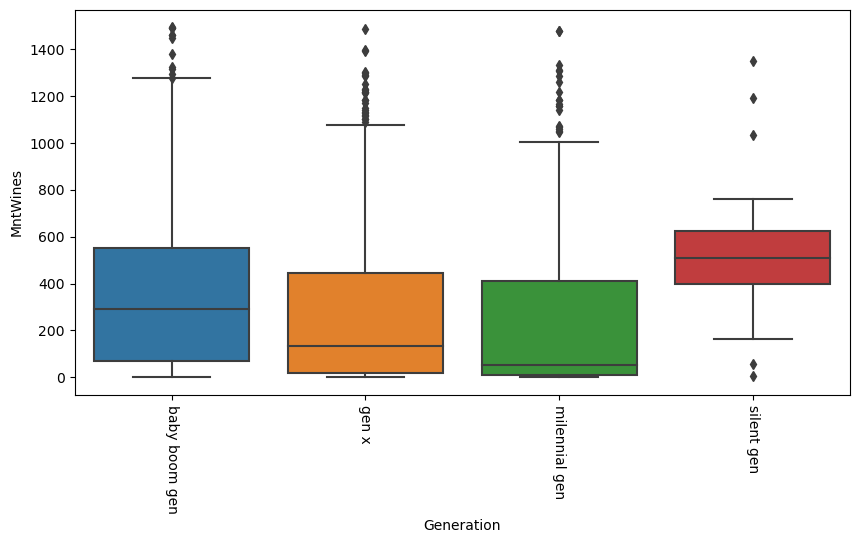

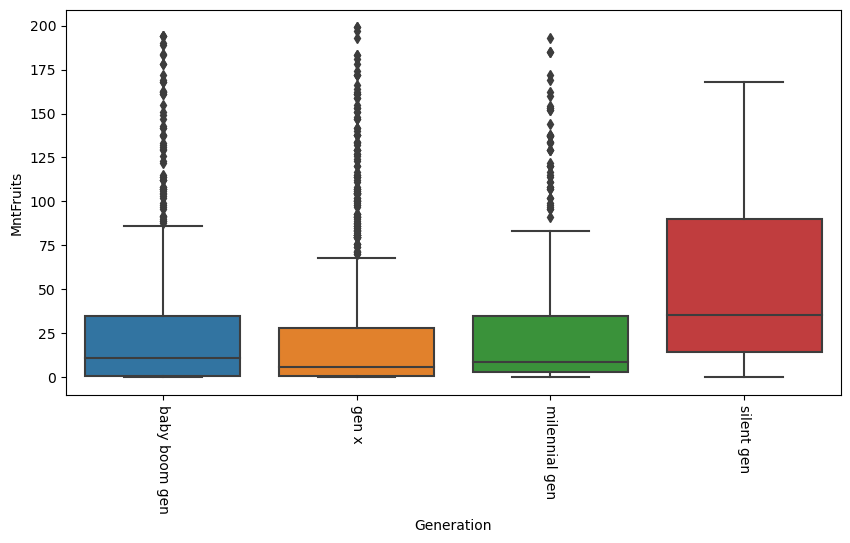

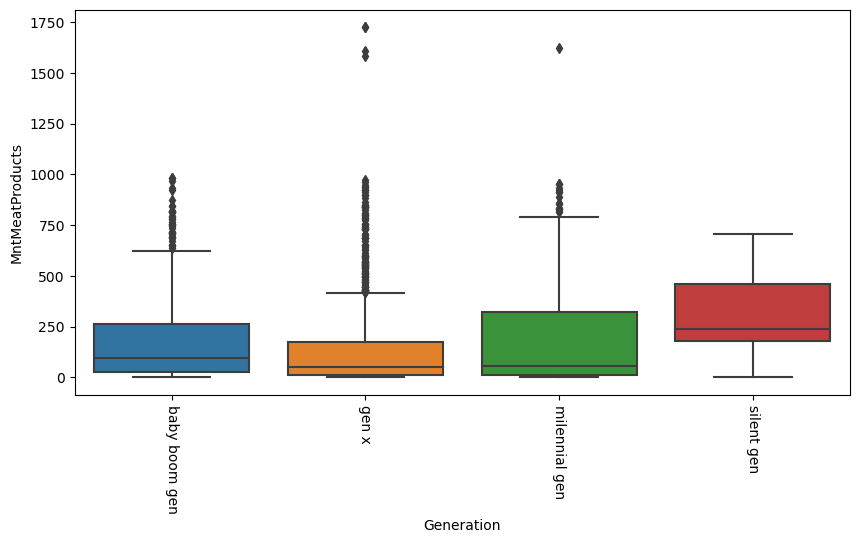

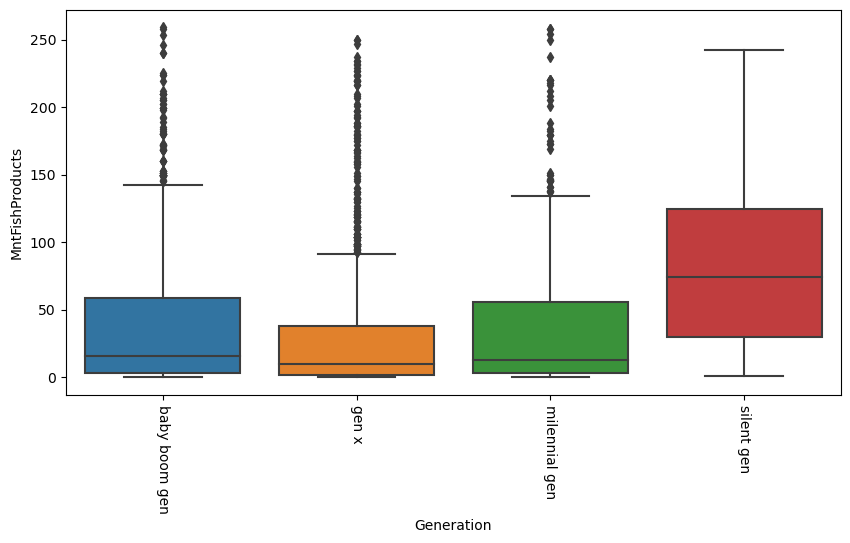

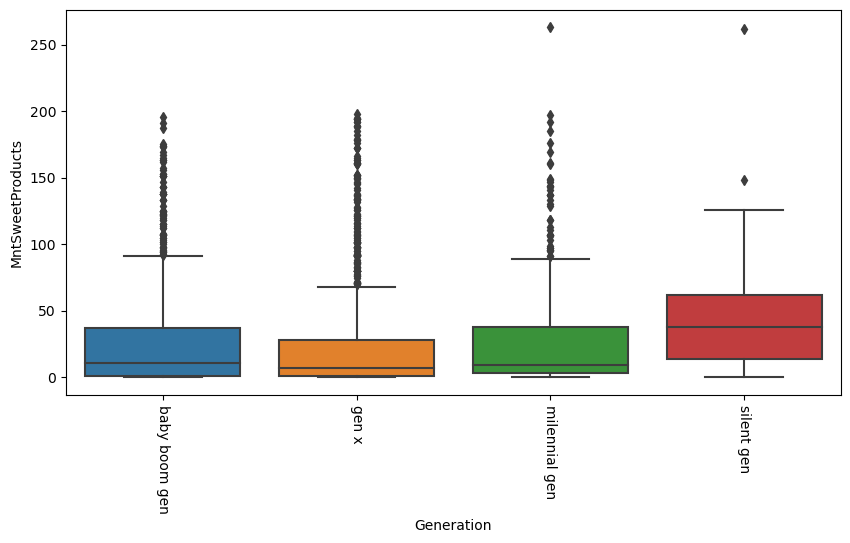

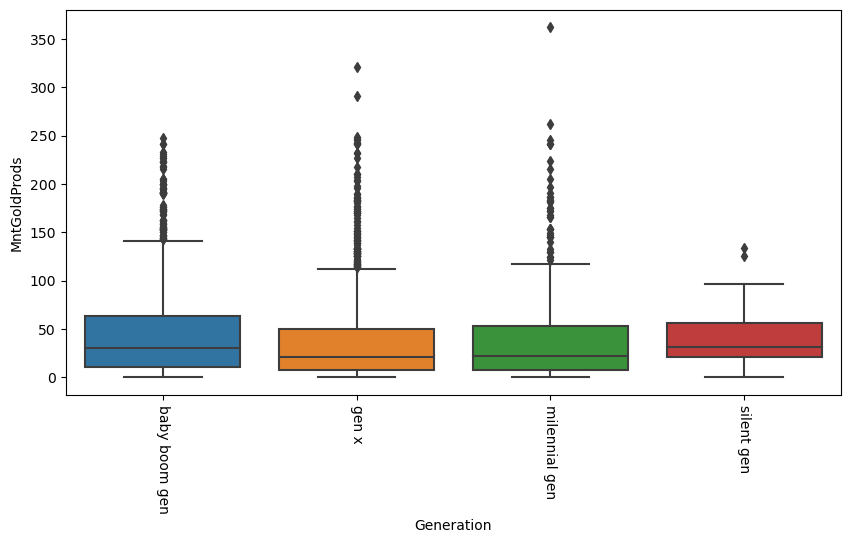

In [29]:
prod = cust[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

for i in prod:
    plt.figure(figsize=[10,5])
    sns.boxplot(data=cust,x='Generation',y=i)
    plt.xticks(rotation=-90)
    plt.show()

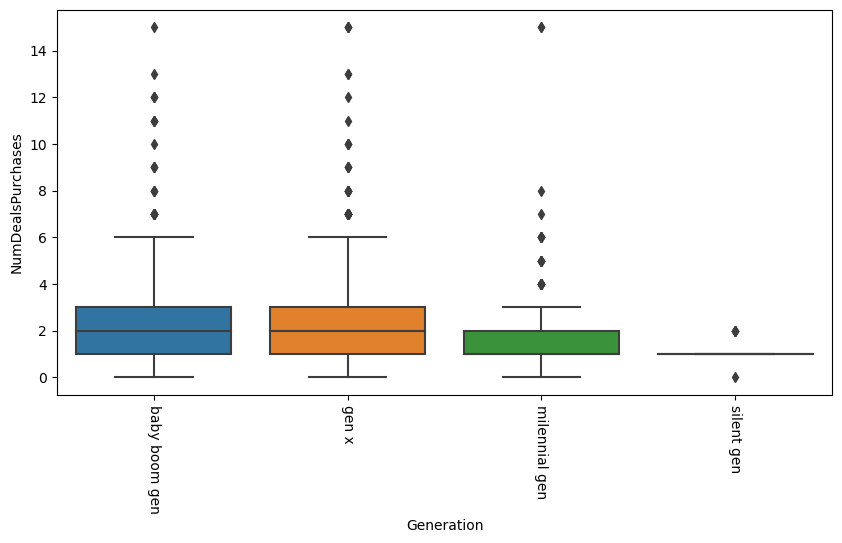

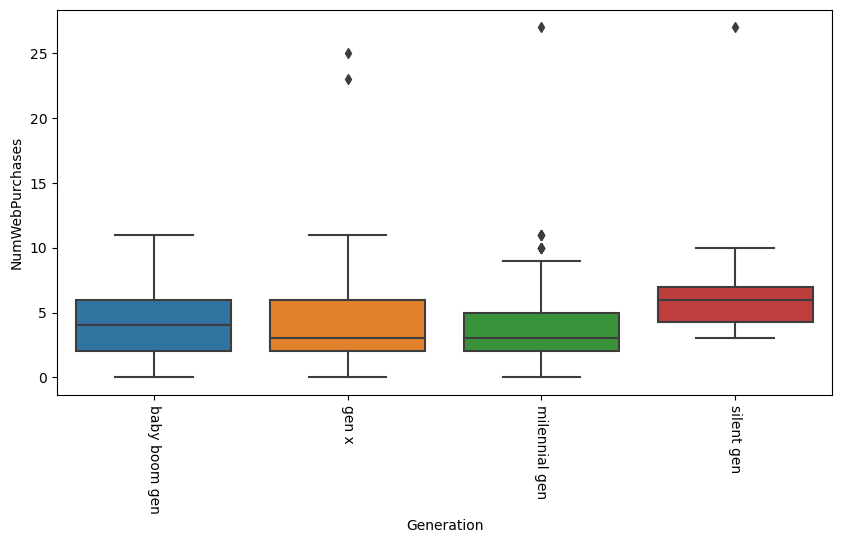

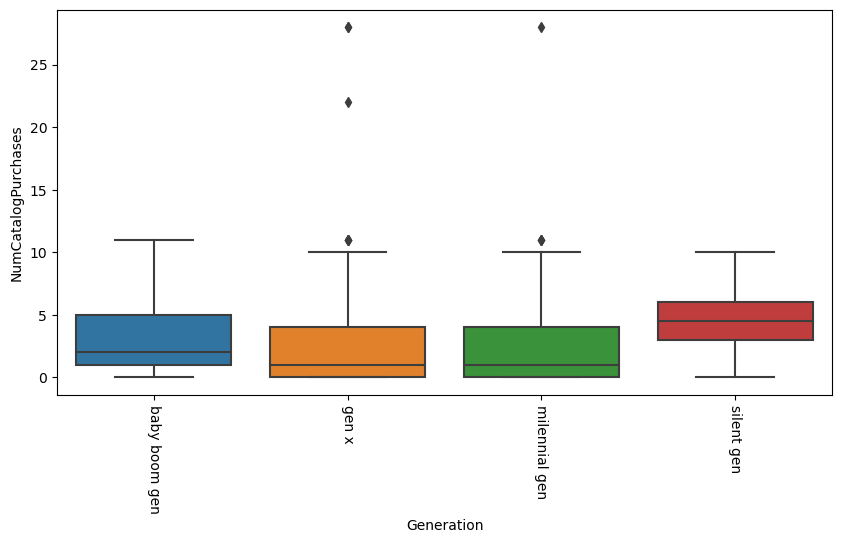

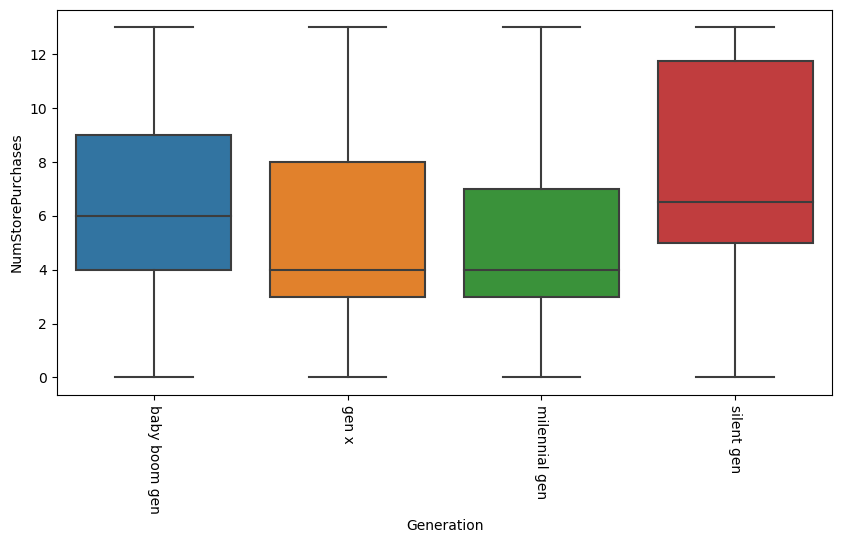

In [30]:
purch = cust[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]


for i in purch:
    plt.figure(figsize=[10,5])
    sns.boxplot(data=cust,y=i,x='Generation')
    plt.xticks(rotation=-90)
    plt.show()

### Model building

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

reduce dimensions down to two in order to plot

In [37]:
scale = StandardScaler()
cust_std = scale.fit_transform(cust3)

pca = PCA(n_components=2)
cust_pca = pca.fit_transform(cust_std)

For n_clusters = 2 The average silhouette_score is : 0.5087548563855503
For n_clusters = 3 The average silhouette_score is : 0.5175340143235926
For n_clusters = 4 The average silhouette_score is : 0.43337687734757274
For n_clusters = 5 The average silhouette_score is : 0.3931176844156162
For n_clusters = 6 The average silhouette_score is : 0.3803913899019231


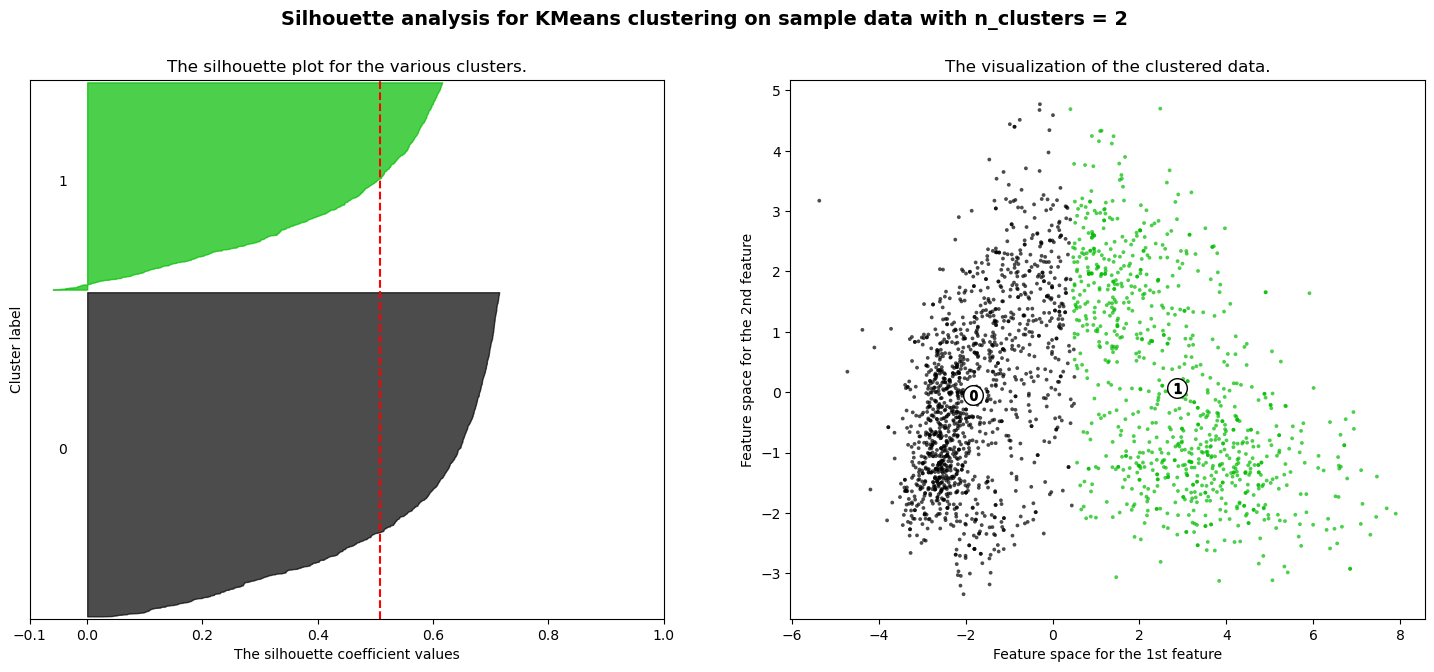

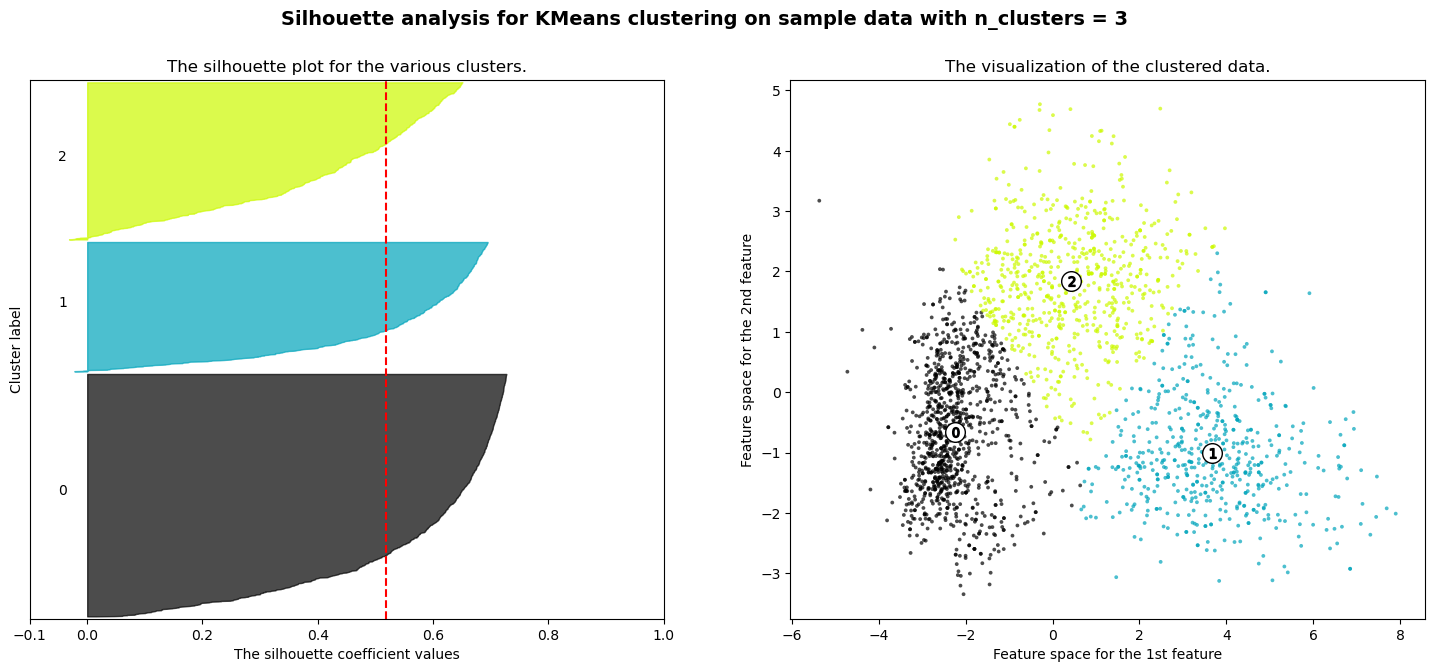

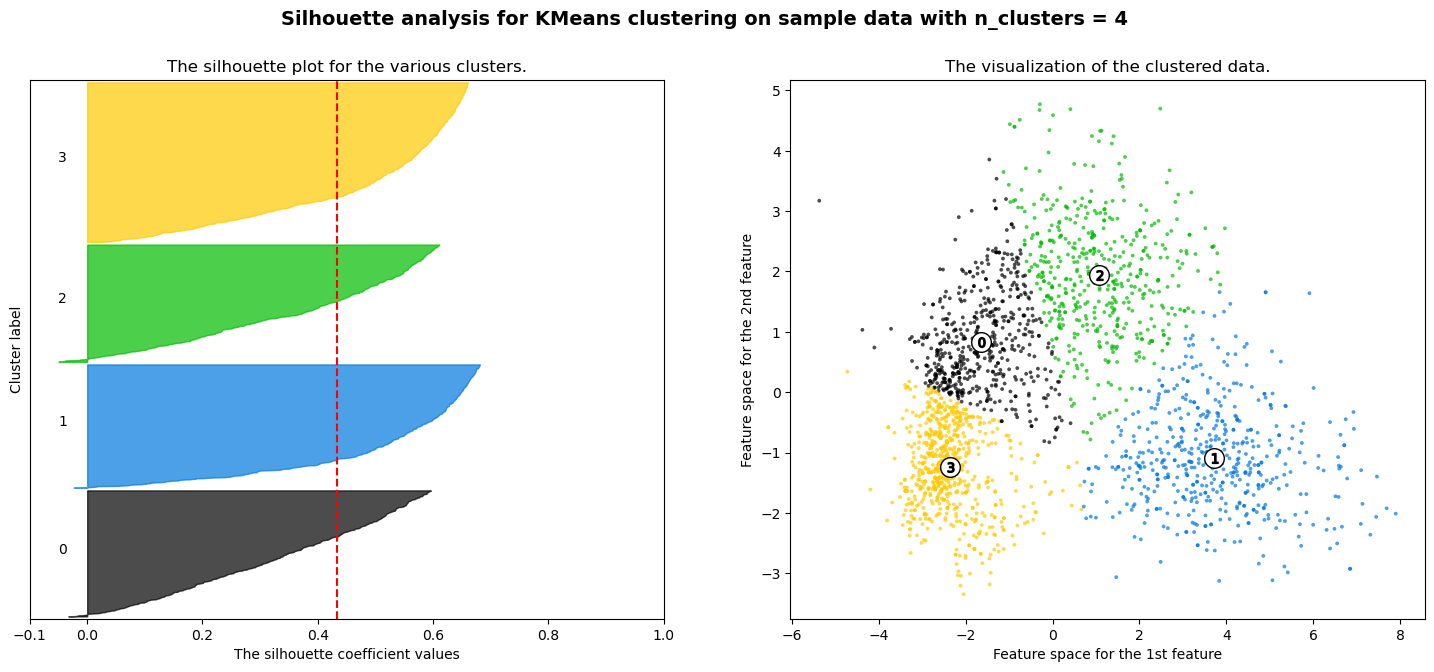

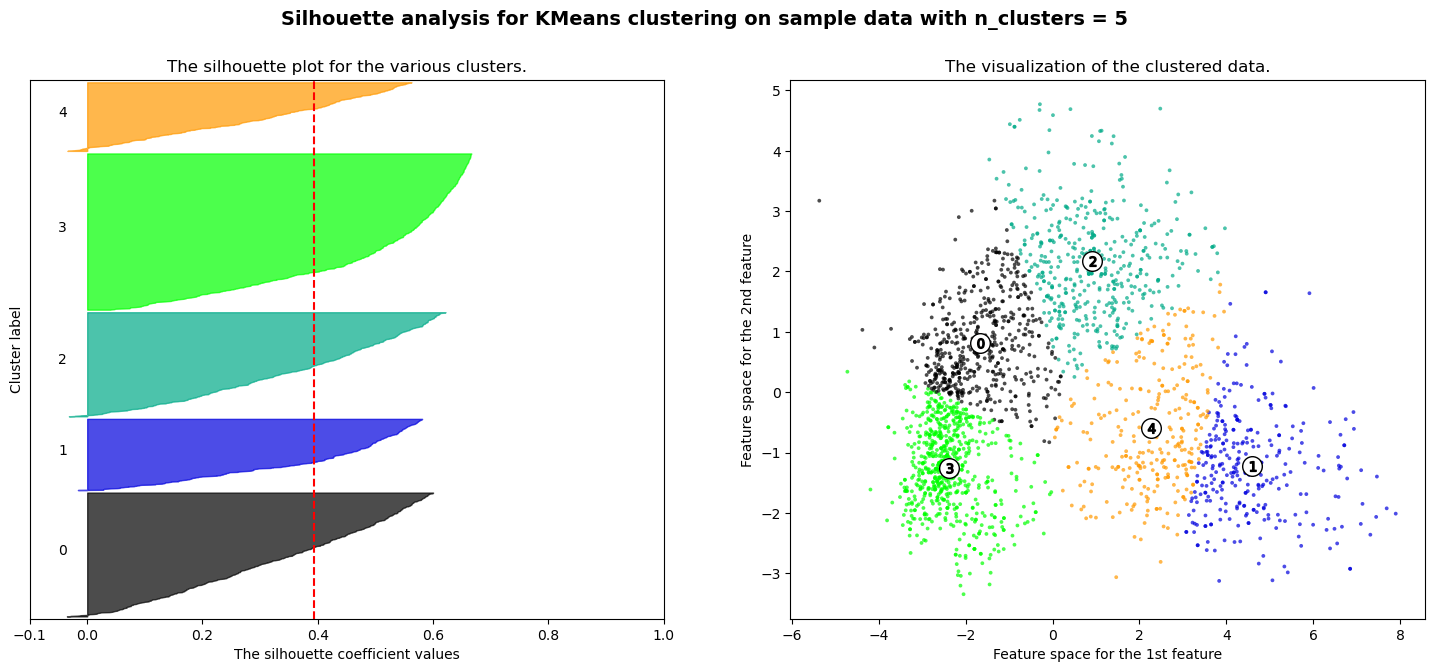

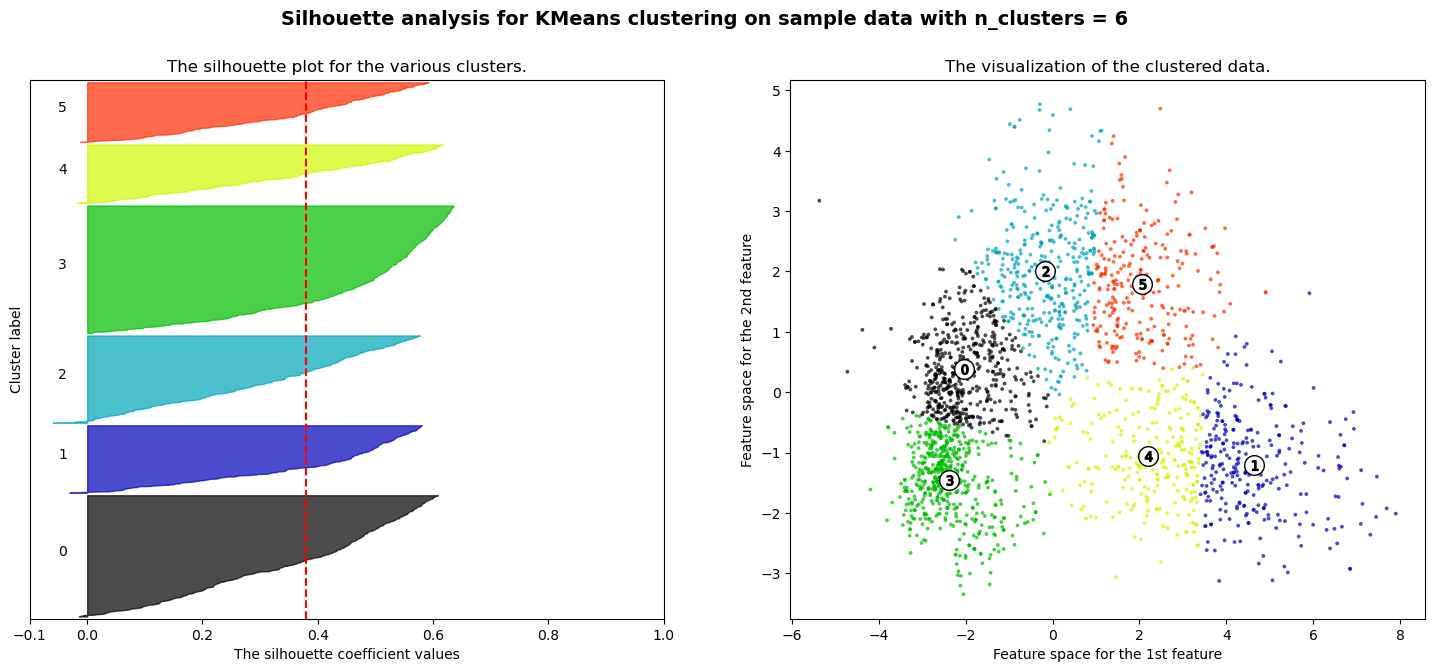

In [38]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cust_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,n_init='auto')
    cluster_labels = clusterer.fit_predict(cust_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cust_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cust_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        cust_pca[:, 0], cust_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [40]:
scaler = StandardScaler()
cust_std2 = scaler.fit_transform(cust3)

kmean = KMeans(n_clusters=3,random_state=10,n_init='auto')
cust_kmean = kmean.fit(cust_std2)

In [43]:
cust_kmean.labels_

array([1, 2, 1, ..., 1, 0, 2])

In [48]:
cust4 = cust3.copy()
cust4['label'] = cust_kmean.labels_

In [49]:
cust4

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,children,years,Education_num,Marital_Status_num,Income_Bracket_num,Generation_num,label
0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,12.304110,2,4,4,0,1
1,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1,10.797260,2,4,3,0,2
2,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,11.342466,2,5,4,1,1
3,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,10.868493,2,5,3,2,2
4,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,10.928767,4,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,11.531507,2,3,4,1,0
2236,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1,10.539726,4,5,4,0,0
2237,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,10.912329,2,2,4,2,1
2238,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,10.915068,3,5,4,0,0


In [50]:
cust_pca2 = pca.fit_transform(cust_std2)

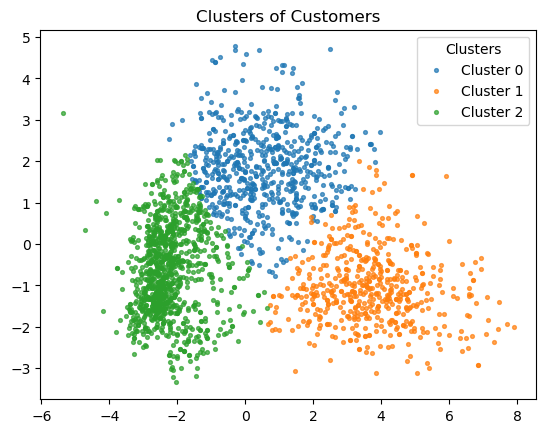

In [95]:
unique_labels = np.unique(cust_kmean.labels_)
for label in unique_labels:
    cluster_points = cust_pca2[cust_kmean.labels_ == label]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        marker=".",
        s=30,
        alpha=0.7,
        label=f"Cluster {label}"
    )

plt.title('Clusters of Customers')
plt.legend(title="Clusters", loc="best")  # Add a legend
plt.show()

### Cluster Identification analysis

In [60]:
cust['label'] = cust_kmean.labels_
cust['total_spent'] = cust['MntWines']+cust['MntFruits']+cust['MntMeatProducts']+cust['MntFishProducts']+cust['MntSweetProducts']+cust['MntGoldProds']
cust['total_response'] = cust['AcceptedCmp1']+ cust['AcceptedCmp2']+ cust['AcceptedCmp3']+ cust['AcceptedCmp4']+ cust['AcceptedCmp5']
cust['total_purchase'] = cust['NumDealsPurchases']+cust['NumWebPurchases']+cust['NumCatalogPurchases']+cust['NumStorePurchases']


In [61]:
cust.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'children', 'Income_Bracket',
       'Generation', 'today', 'Days', 'years', 'label', 'total_spent',
       'total_response', 'total_purchase'],
      dtype='object')

In [78]:
spendmean = cust.groupby('label')['total_spent'].mean().reset_index()
respmean = cust.groupby('label')['total_response'].mean().reset_index()
purchmean = cust.groupby('label')['total_purchase'].mean().reset_index()

spendmean,respmean,purchmean

(   label  total_spent
 0      0   788.858243
 1      1  1376.698502
 2      2   100.423954,
    label  total_response
 0      0        0.251156
 1      1        0.773408
 2      2        0.084601,
    label  total_purchase
 0      0       21.456086
 1      1       20.308989
 2      2        8.046578)

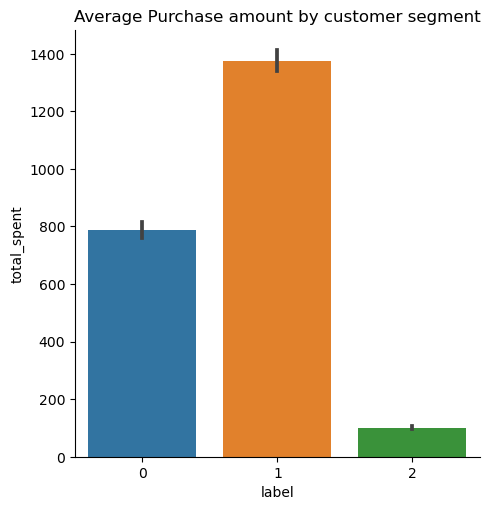

In [79]:
sns.catplot(data=cust,x='label',y='total_spent',kind='bar')
plt.title('Average purchase amount by customer segment')
plt.show()

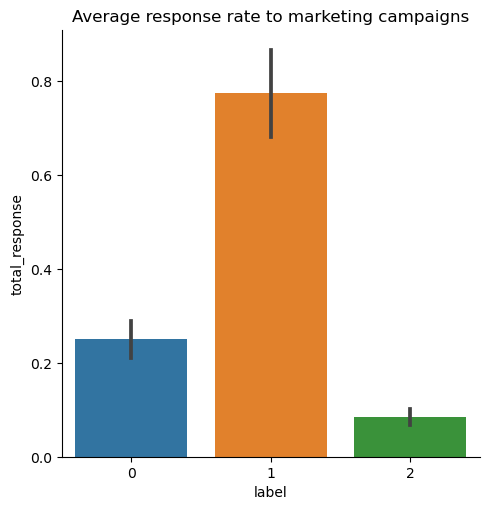

In [80]:
sns.catplot(data=cust,x='label',y='total_response',kind='bar')
plt.title('Average response rate to marketing campaigns by customer segment')
plt.show()

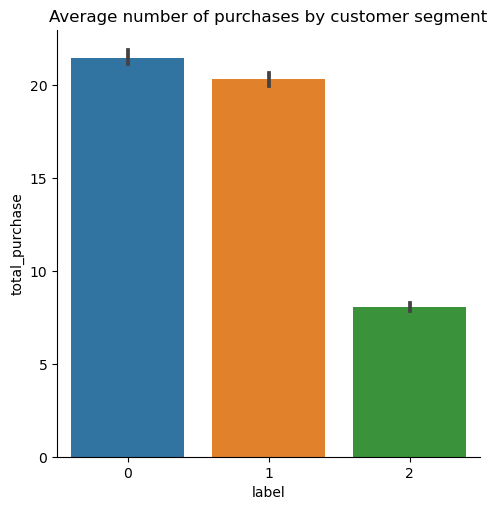

In [81]:
sns.catplot(data=cust,x='label',y='total_purchase',kind='bar')
plt.title('Average number of purchases by customer segment')
plt.show()

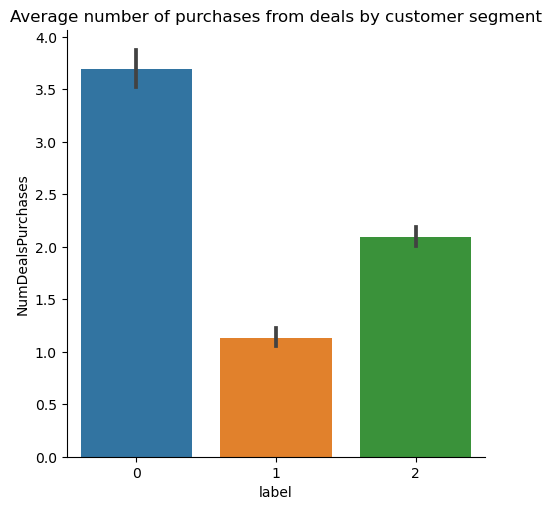

In [83]:
sns.catplot(data=cust,x='label',y='NumDealsPurchases',kind='bar')
plt.title('Average number of purchases from deals by customer segment')
plt.show()

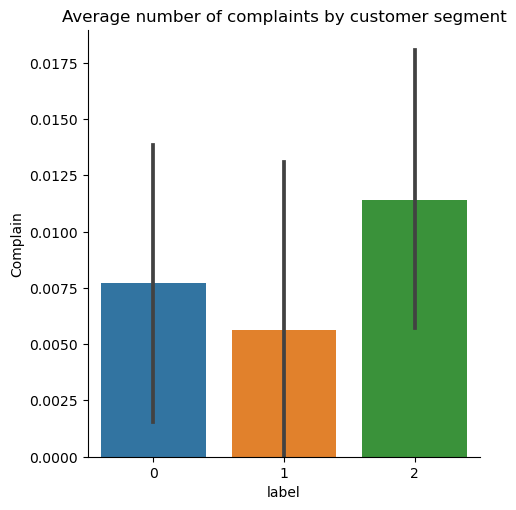

In [84]:
sns.catplot(data=cust,x='label',y='Complain',kind='bar')
plt.title('Average number of complaints by customer segment')
plt.show()

### Cluster Demographics

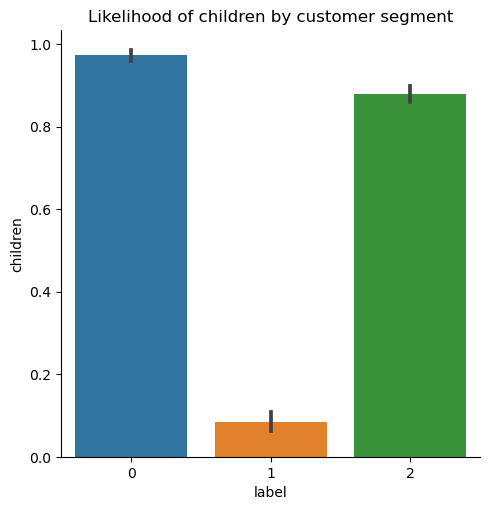

In [86]:
sns.catplot(data=cust,x='label',y='children',kind='bar')
plt.title('Likelihood of children by customer segment')
plt.show()

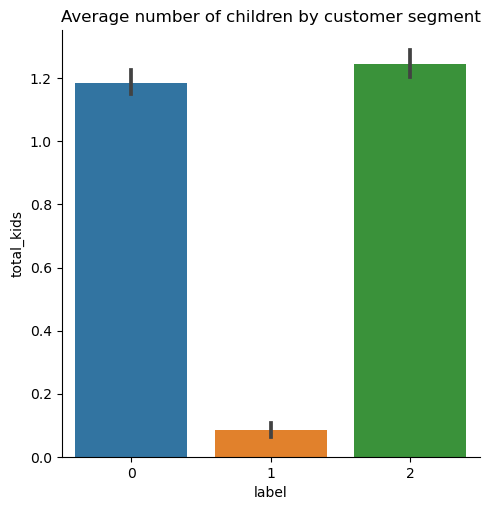

In [92]:
cust['total_kids'] = cust['Kidhome']+cust['Teenhome']

sns.catplot(data=cust,x='label',y='total_kids',kind='bar')
plt.title('Average number of children by customer segment')
plt.show()

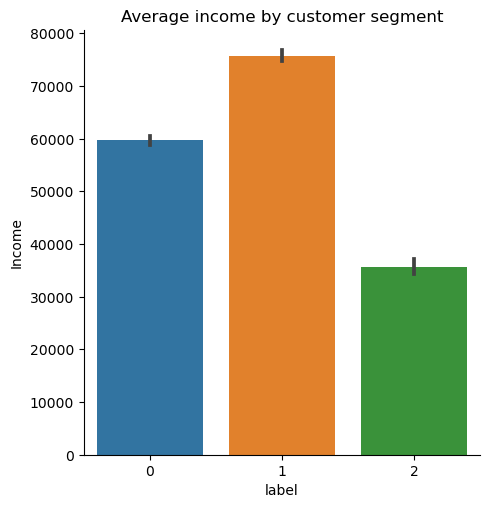

In [87]:
sns.catplot(data=cust,x='label',y='Income',kind='bar')
plt.title('Average income by customer segment')
plt.show()

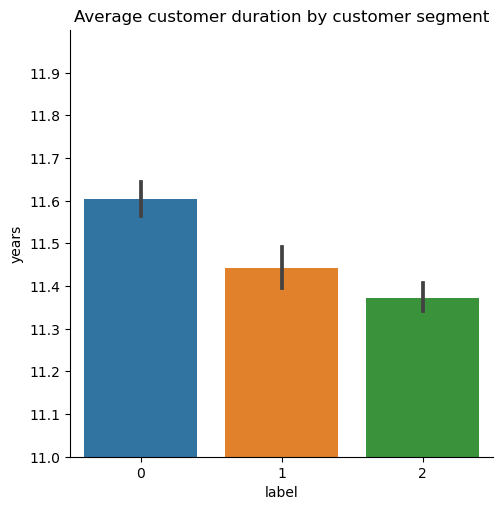

In [91]:
sns.catplot(data=cust,x='label',y='years',kind='bar')
plt.title('Average customer duration by customer segment')
plt.yticks(np.arange(11,12,.1))
plt.ylim(11,12)
plt.show()

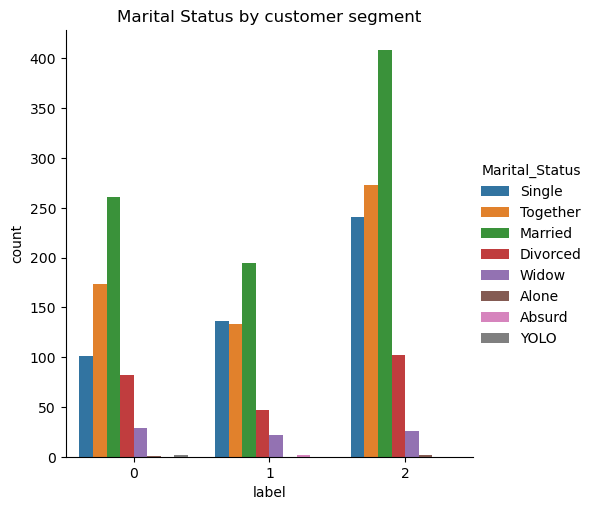

In [153]:
sns.catplot(data=cust,x='label',hue='Marital_Status',kind='count')
plt.title('Marital Status by customer segment')
plt.show()

In [147]:
count0 = cust[cust['label']==0]['Marital_Status'].value_counts().reset_index()
count1 = cust[cust['label']==1]['Marital_Status'].value_counts().reset_index()
count2 = cust[cust['label']==2]['Marital_Status'].value_counts().reset_index()
count0 = count0.drop(count0[count0['index'].isin(['Alone','YOLO'])].index)
count1 = count1.drop(count1[count1['index'].isin(['Absurd'])].index)

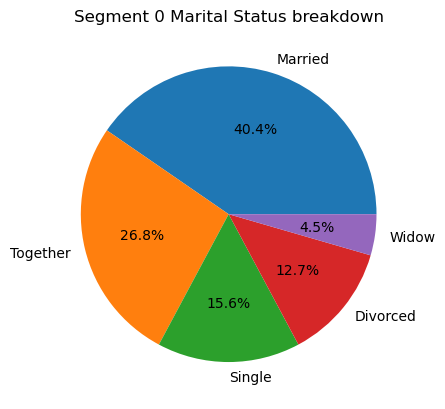

In [152]:
plt.pie(count0['Marital_Status'],labels=count0['index'],autopct='%1.1f%%')
plt.title('Segment 0 Marital Status breakdown')
plt.show()

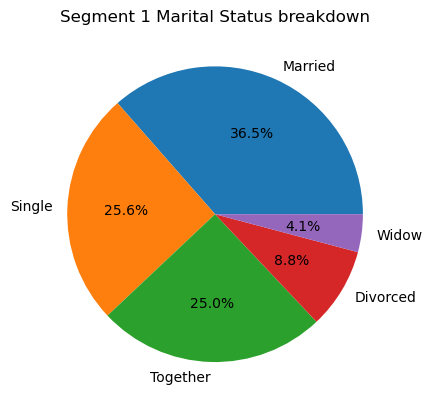

In [149]:
plt.pie(count1['Marital_Status'],labels=count1['index'],autopct='%1.1f%%')
plt.title('Segment 1 Marital Status breakdown')
plt.show()

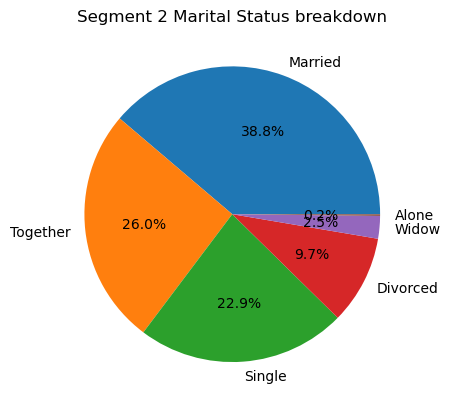

In [150]:
plt.pie(count2['Marital_Status'],labels=count2['index'],autopct='%1.1f%%')
plt.title('Segment 2 Marital Status breakdown')
plt.show()

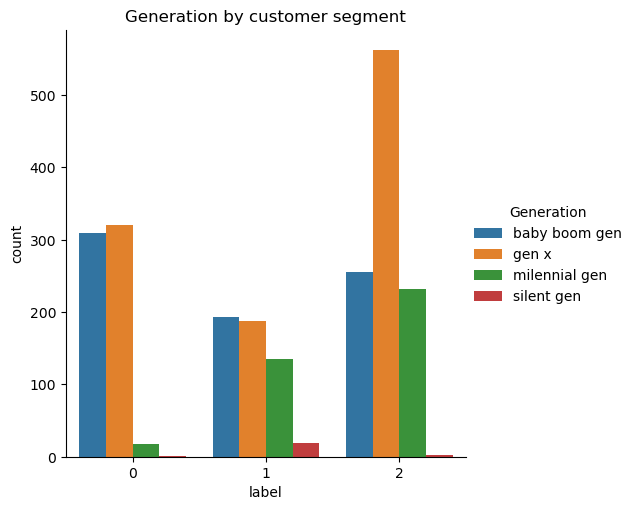

In [94]:
sns.catplot(data=cust,x='label',hue='Generation',kind='count')
plt.title('Generation by customer segment')
plt.show()

In [133]:
gen0 = cust[cust['label']==0]['Generation'].value_counts().reset_index()
gen1 = cust[cust['label']==1]['Generation'].value_counts().reset_index()
gen2 = cust[cust['label']==2]['Generation'].value_counts().reset_index()

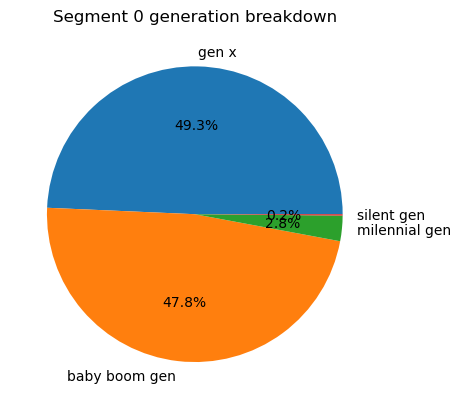

In [137]:
plt.pie(gen0['Generation'],labels=gen0['index'],autopct='%1.1f%%')
plt.title('Segment 0 generation breakdown')
plt.show()

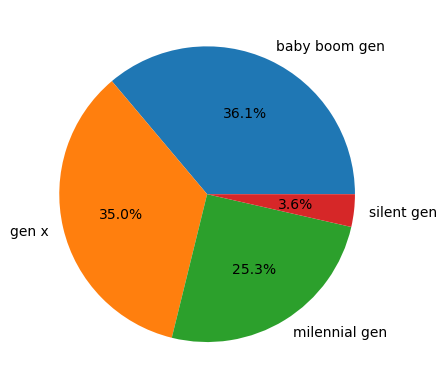

In [135]:
plt.pie(gen1['Generation'],labels=gen1['index'],autopct='%1.1f%%')
plt.title('Segment 1 generation breakdown')
plt.show()

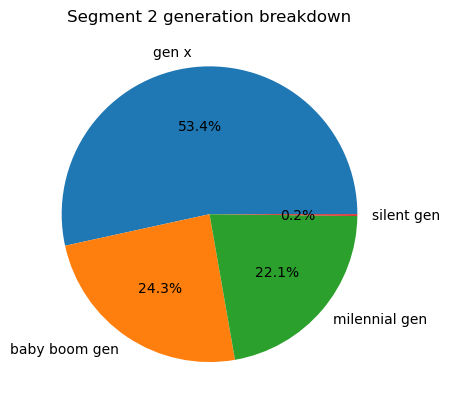

In [138]:
plt.pie(gen2['Generation'],labels=gen2['index'],autopct='%1.1f%%')
plt.title('Segment 2 generation breakdown')
plt.show()